# Preprocessing

In [1]:
%run project_functions.ipynb

In [2]:
file_name = 'FB.txt'
csv_name = 'FB.csv'

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000)
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'bin')
text_only = split_data(agg_data, 0.7, 'text', 'close_return', 'bin')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

X_train1 = text_only['X_train']
Y_train1 = text_only['Y_train']
X_test1 = text_only['X_test']
Y_test1 = text_only['Y_test']

# Logistic Regression - Recursive Feature Selection

In [4]:
#Perform Recursive Feature Selection (5-fold CV)
log_reg = LogisticRegression()

rfecv = RFECV(estimator=log_reg, step=1,cv=5)
rfecv.fit(X_train1, Y_train)

X_train_rfecv = rfecv.transform(X_train1)
X_test_rfecv = rfecv.transform(X_test1)

#Fit Model
clf_lr = log_reg.fit(X_train_rfecv, Y_train)

#Predict
pred_train_lr = clf_lr.predict(X_train_rfecv)
pred_test_lr = clf_lr.predict(X_test_rfecv)

In [5]:
#Number of Features Selected
rfecv.n_features_

3

In [6]:
#Generate Confusion Matrices
confusion_train_lr = confusion_matrix(Y_train, pred_train_lr)
confusion_test_lr = confusion_matrix(Y_test, pred_test_lr)

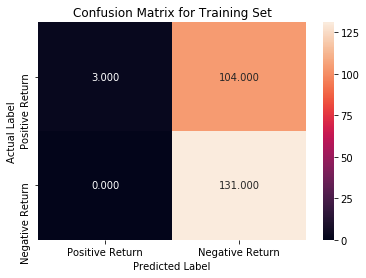

In [7]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_lr, "Training")

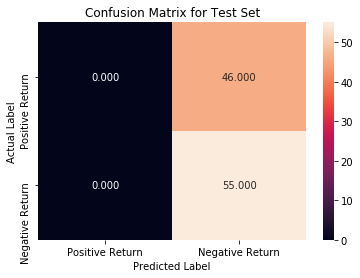

In [8]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_lr, "Test")

In [9]:
#Calculate Metrics
tablelr = create_metrics_table(Y_train, pred_train_lr, Y_test, pred_test_lr)
tablelr

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.0,0.557447,0.715847,0.563025
Test,1.0,0.544554,0.705128,0.544554


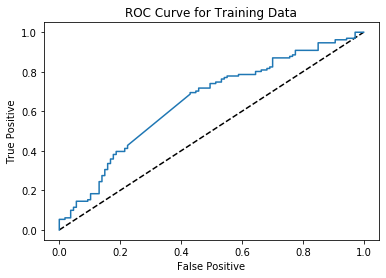

In [10]:
#Generate ROC Curves for Training
pred_train_prob_lr = clf_lr.predict_proba(X_train_rfecv)[:,1]
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_lr)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

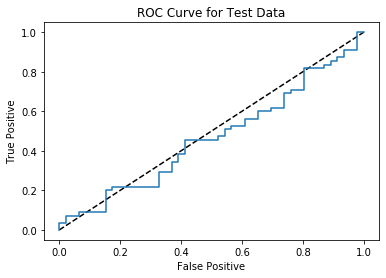

In [11]:
#Generate ROC Curves for Training
pred_test_prob_lr = clf_lr.predict_proba(X_test_rfecv)[:,1]
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_lr)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_test, TPR_test, "Test")

# Logistic Regression - LASSO (L1 Penalty)

In [12]:
#Fit model using Logistic Regression with L1 penalty (5-fold CV)
clf_l1 = LogisticRegressionCV(Cs=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5], cv = 5, penalty = "l1", solver = 'liblinear').fit(X_train, Y_train)

#Predict
pred_train_l1 = clf_l1.predict(X_train)
pred_test_l1 = clf_l1.predict(X_test)

In [13]:
#Generate Confusion Matrices
confusion_train_l1 = confusion_matrix(Y_train, pred_train_l1)
confusion_test_l1 = confusion_matrix(Y_test, pred_test_l1)

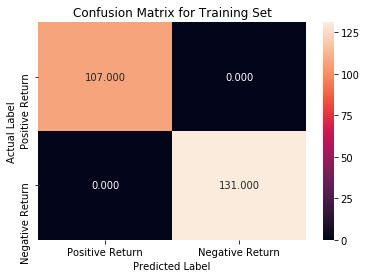

In [14]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_l1, "Training")

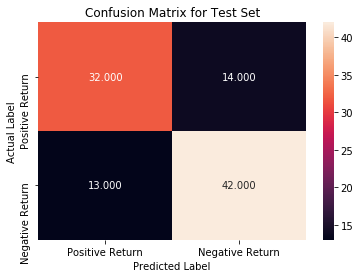

In [15]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_l1, "Test")

In [16]:
#Calculate Metrics
tablel1 = create_metrics_table(Y_train, pred_train_l1, Y_test, pred_test_l1)
tablel1

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.00,1.000000,1.000000
Test,0.763636,0.75,0.756757,0.732673


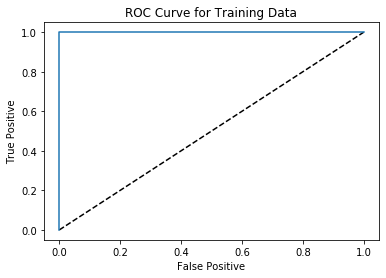

In [17]:
#Generate ROC Curves for Training
pred_train_prob_l1 = clf_l1.predict_proba(X_train)[:,1]
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_l1)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

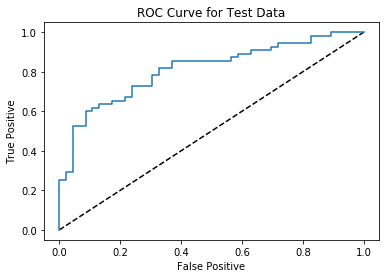

In [18]:
#Generate ROC Curves for Test
pred_test_prob_l1 = clf_l1.predict_proba(X_test)[:,1]
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_l1)

#Plot ROC Curve for Test Data
plot_ROC_curve(FPR_test, TPR_test, "Test")

# Logistic Regression - Ridge (L2 Penalty)

In [19]:
#Fit model using Ridge Classifier (5-fold CV)
clf_l2 = RidgeClassifierCV(alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5], cv = 5).fit(X_train, Y_train)

#Predict
pred_train_l2 = clf_l2.predict(X_train)
pred_test_l2 = clf_l2.predict(X_test)

In [20]:
#Generate Confusion Matrices
confusion_train_l2 = confusion_matrix(Y_train, pred_train_l2)
confusion_test_l2 = confusion_matrix(Y_test, pred_test_l2)

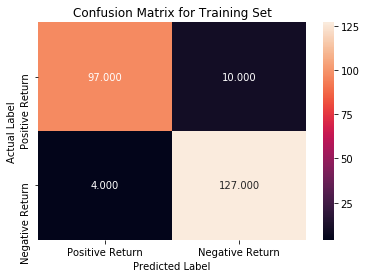

In [21]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_l2, "Training")

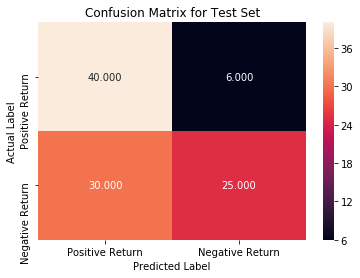

In [22]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_l2, "Test")

In [23]:
#Calculate Metrics
tablel2 = create_metrics_table(Y_train, pred_train_l2, Y_test, pred_test_l2)
tablel2

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,0.969466,0.927007,0.947761,0.941176
Test,0.454545,0.806452,0.581395,0.643564


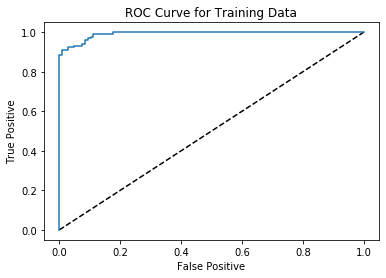

In [24]:
#Generate ROC Curves for Training
pred_train_prob_l2 = clf_l2.decision_function(X_train)
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_l2)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

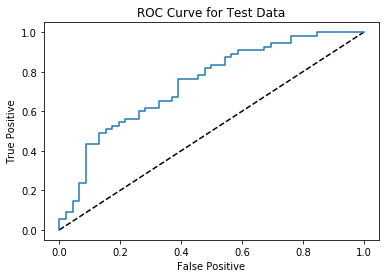

In [25]:
#Generate ROC Curves for Training
pred_test_prob_l2 = clf_l2.decision_function(X_test)
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_l2)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_test, TPR_test, "Test")